<h1>Feature Engineering</h1>

Importamos librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

Importamos el dataset

In [3]:
dataframe = pd.read_csv("../data/clean_dataset_terror_movies.csv")
dataframe = dataframe.iloc[:,2:]
dataframe.head()

,id,poster_path,adult,overview,release_date,genre_ids,original_title,original_language,title,backdrop_path,...,Acción,Comedia,Historia,Western,Suspense,Crimen,Ciencia ficción,Misterio,Documental,reciente
0,1011679,/v5CfpzxoJDkZxjZAizClFdlEF0U.jpg,False,"Hace décadas, la URSS desarrolló tiburones imp...",2022-08-12,28-878-53-27,Shark Side of the Moon,en,Shark Side of the Moon,/AsEgGeccI32SwMBkxpwhOkhbzmF.jpg,...,1,0,0,0,1,0,1,0,0,1
1,884184,/yQTRmPzKAdLodknnPVtImm6FWPZ.jpg,False,Después del presunto suicidio de su hermano sa...,2023-02-10,27-53,Consecration,en,Consecration,/sRfX2XPjyL7nRKVRKXVG6D0bVQI.jpg,...,0,0,0,0,1,0,0,0,0,0
2,988165,/5KmscR49WkmuPJKjmK4OUmsRn5C.jpg,False,Decidido a demostrar la posibilidad de dimensi...,2022-06-29,27,H.P. Lovecraft's Witch House,en,HP La casa de la bruja de Lovecraft,/7cjY1IIrW1RwmHN8USPryKTAQHq.jpg,...,0,0,0,0,0,0,0,0,0,1
3,829410,/nBgxSimgLMGYCQckRQw7C2f7row.jpg,False,"Durante la pandemia, Parker y su mejor amigo d...",2022-09-24,27-53,Sick,en,Sick,/ve3RLbCSuUKA02OZJ5F0fMmXVMn.jpg,...,0,0,0,0,1,0,0,0,0,1
4,676547,/hbtJK32km46jTmlvBXgR8SunfAp.jpg,False,"Una joven monja, la hermana Ann (Jacqueline By...",2022-10-28,27-53,Prey for the Devil,en,Reza por el diablo,/94kQGMiFbs5MUTlt7kj9dewsMDi.jpg,...,0,0,0,0,1,0,0,0,0,1


Quitamos columnas que no aportan información

In [4]:
dataframe = dataframe.drop(["adult", "overview", "spoken_languagess", "poster_path", "backdrop_path", "video"], axis=1)
dataframe.set_index("id")

,release_date,genre_ids,original_title,original_language,title,popularity,vote_count,vote_average,media_type,budget,...,Acción,Comedia,Historia,Western,Suspense,Crimen,Ciencia ficción,Misterio,Documental,reciente
id,,,,,,,,,,,,,,,,,,,,,
1011679,2022-08-12,28-878-53-27,Shark Side of the Moon,en,Shark Side of the Moon,456.059,117,5.3,movie,10000,...,1,0,0,0,1,0,1,0,0,1
884184,2023-02-10,27-53,Consecration,en,Consecration,451.660,29,6.6,movie,0,...,0,0,0,0,1,0,0,0,0,0
988165,2022-06-29,27,H.P. Lovecraft's Witch House,en,HP La casa de la bruja de Lovecraft,406.610,12,5.8,movie,0,...,0,0,0,0,0,0,0,0,0,1
829410,2022-09-24,27-53,Sick,en,Sick,358.328,126,6.3,movie,0,...,0,0,0,0,1,0,0,0,0,1
676547,2022-10-28,27-53,Prey for the Devil,en,Reza por el diablo,357.880,612,7.1,movie,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636900,2019-10-30,27,A Halloween Trick,en,A Halloween Trick,1.034,2,3.0,movie,0,...,0,0,0,0,0,0,0,0,0,4
628959,2019-10-05,27,Lady Belladonna's Tales From The Inferno,en,Lady Belladonna's Tales From The Inferno,0.840,2,6.5,movie,0,...,0,0,0,0,0,0,0,0,0,4
627132,2012-10-30,27-53,Fade Into You,en,Fade Into You,0.864,5,5.6,movie,0,...,0,0,0,0,1,0,0,0,0,11


In [5]:
dataframe.columns

Index(['id', 'release_date', 'genre_ids', 'original_title',
       'original_language', 'title', 'popularity', 'vote_count',
       'vote_average', 'media_type', 'budget', 'duration', 'revenues',
       'genre_list', 'is_terror_comedia', 'val_count', 'quantile',
       'count_labels', 'Música', 'Romance', 'Familia', 'Bélica',
       'Película de TV', 'Aventura', 'Fantasía', 'Animación', 'Drama',
       'Terror', 'Acción', 'Comedia', 'Historia', 'Western', 'Suspense',
       'Crimen', 'Ciencia ficción', 'Misterio', 'Documental', 'reciente'],
      dtype='object')

Viendo los grupos agregados por terror comedia podemos intuir que características van a ser más indicativas

In [6]:
sum_terror = dataframe.groupby("is_terror_comedia").sum()
sum_terror

C:\Users\yporq\AppData\Local\Temp\ipykernel_15520\4167532788.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_terror = dataframe.groupby("is_terror_comedia").sum()


,id,popularity,vote_count,vote_average,budget,duration,revenues,val_count,quantile,count_labels,...,Acción,Comedia,Historia,Western,Suspense,Crimen,Ciencia ficción,Misterio,Documental,reciente
is_terror_comedia,,,,,,,,,,,,,,,,,,,,,
0,1711047965,26016.141,618172,17975.4,4733809916,326188,12911425448,5186383,5652,7026,...,331,865,5,20,0,76,502,245,73,34287
1,853296695,27153.506,785128,12200.1,5129163005,217529,16605063001,1079319,840,6633,...,197,106,0,3,2476,115,217,484,5,22541


In [7]:
import datetime
dataframe["release_date"] = pd.to_datetime(dataframe['release_date'])

<AxesSubplot: xlabel='release_date', ylabel='revenues'>

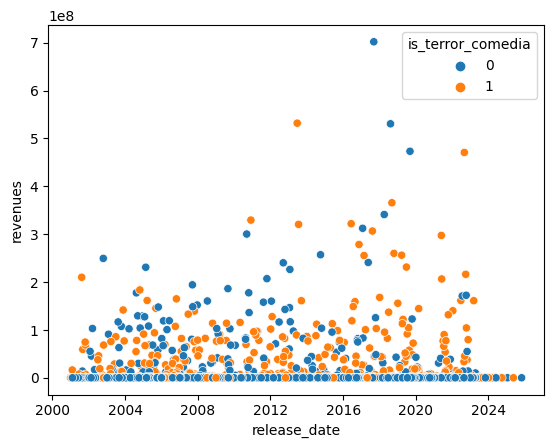

In [8]:
sns.scatterplot(data=dataframe,x =dataframe["release_date"], y=dataframe["revenues"],  hue="is_terror_comedia")

Existe un patrón en el quantil 1

<AxesSubplot: xlabel='revenues', ylabel='quantile'>

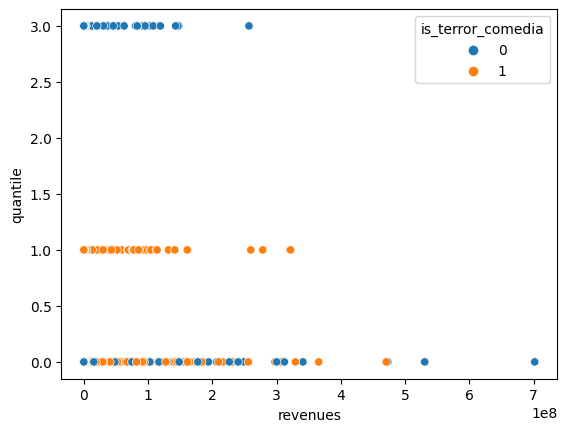

In [9]:
sns.scatterplot(data=dataframe,x =dataframe["revenues"], y=dataframe["quantile"],  hue="is_terror_comedia")

<AxesSubplot: xlabel='release_date', ylabel='is_terror_comedia'>

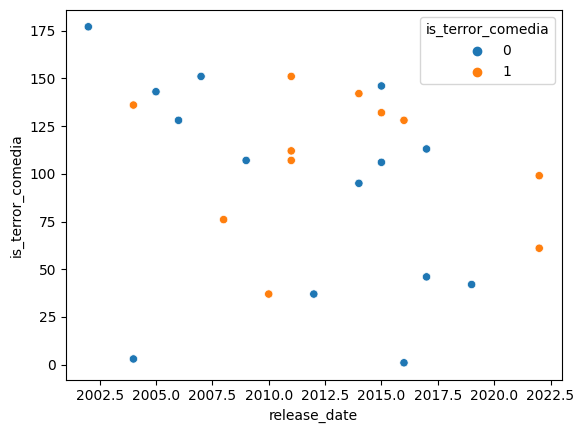

In [10]:
sns.scatterplot(data=dataframe,x =dataframe["release_date"].dt.year, y=dataframe.groupby(dataframe.release_date.dt.year)["is_terror_comedia"].sum(),  hue="is_terror_comedia")

<AxesSubplot: xlabel='release_date', ylabel='is_terror_comedia'>

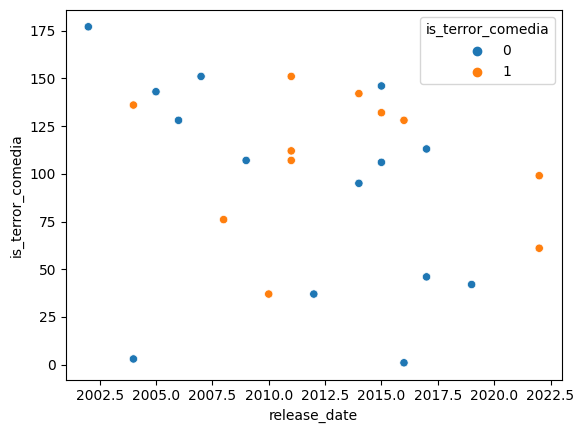

In [11]:
sns.scatterplot(data=dataframe,x =dataframe["release_date"].dt.year, y=dataframe.groupby(dataframe.release_date.dt.year)["is_terror_comedia"].sum(),  hue="is_terror_comedia")

<AxesSubplot: xlabel='val_count', ylabel='revenues'>

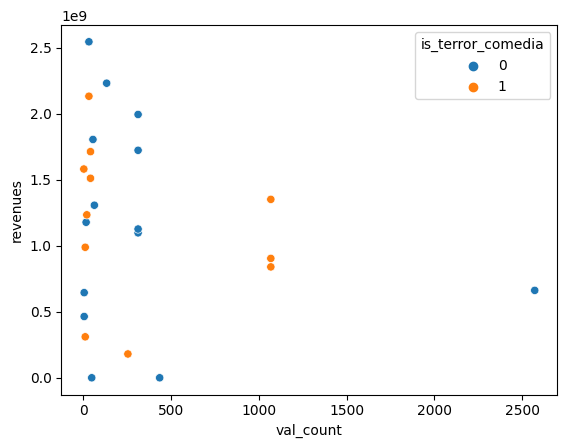

In [12]:
sns.scatterplot(data=dataframe,x =dataframe["val_count"], y=dataframe.groupby(dataframe.release_date.dt.year)["revenues"].sum(),  hue="is_terror_comedia")

In [13]:
X = dataframe[["vote_count",   'vote_average', 'duration', "popularity", 'revenues', "val_count",  'quantile','reciente',  'Música', 'Romance', 'Familia', 'Bélica',
       'Película de TV', 'Aventura', 'Fantasía', 'Animación', 'Drama',
       'Terror', 'Acción', 'Comedia', 'Historia', 'Western', 'Suspense',
       'Crimen', 'Ciencia ficción', 'Misterio', 'Documental']]
y = dataframe['is_terror_comedia']
X.shape

(6513, 27)

In [14]:
validation_size = 0.2
seed = 42
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=validation_size,
                                                                    random_state = seed)

Escalamos las columnas numéricas


In [15]:

cols = X_train.columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()


,vote_count,vote_average,duration,popularity,revenues,val_count,quantile,reciente,Música,Romance,...,Terror,Acción,Comedia,Historia,Western,Suspense,Crimen,Ciencia ficción,Misterio,Documental
count,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,...,5210.0,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000
mean,0.013332,0.463432,0.136945,0.015830,0.008376,0.377231,0.336020,0.447961,0.003647,0.011324,...,0.0,0.078887,0.150480,0.000960,0.003647,0.377159,0.029559,0.109597,0.110749,0.011324
std,0.052209,0.185462,0.044349,0.044758,0.050896,0.421106,0.442212,0.253311,0.060285,0.105822,...,0.0,0.269588,0.357575,0.030967,0.060285,0.484722,0.169382,0.312417,0.313851,0.105822
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000314,0.390000,0.131579,0.002707,0.000000,0.016738,0.000000,0.250000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.001069,0.490000,0.144737,0.005558,0.000000,0.120670,0.000000,0.416667,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.004652,0.580000,0.154605,0.014529,0.000000,1.000000,1.000000,0.666667,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Feature importance

In [16]:
#X.columns[[rfe.support_]]

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Crear un objeto RFE para la regresión logística
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)

# Ajustar el objeto RFE a los datos
rfe.fit(X_train, y_train)

# Obtener las importancias de las características
importances = rfe.ranking_

# Obtener los nombres de las características seleccionadas
feature_names = X.columns[rfe.support_]

features = []
# Imprimir los nombres de las características junto con sus importancias
for feature_name, importance in zip(feature_names, importances):
    print(feature_name, importance)
    features.append([feature_name, importance])
dfFeatures = pd.DataFrame(features, columns = ["feature", "importance"])
# imprimir las columnas seleccionadas
print("Columnas seleccionadas: ", rfe.support_.sort())

# imprimir el ranking de las columnas (0 = eliminado, 1 = seleccionado)
print("Ranking de columnas: ", rfe.ranking_)

vote_average 2
duration 1
popularity 1
val_count 1
quantile 4
reciente 1
Música 1
Romance 1
Película de TV 1
Aventura 1
Fantasía 5
Animación 6
Drama 1
Acción 1
Comedia 1
Western 1
Suspense 1
Crimen 8
Ciencia ficción 1
Documental 1
Columnas seleccionadas:  None
Ranking de columnas:  [2 1 1 1 4 1 1 1 1 1 5 6 1 1 1 1 1 8 1 1 3 1 1 1 1 7 1]


In [18]:
dfFeatures.sort_values(by="importance",ascending=False)

,feature,importance
17,Crimen,8
11,Animación,6
10,Fantasía,5
4,quantile,4
0,vote_average,2
5,reciente,1
6,Música,1
7,Romance,1
8,Película de TV,1
9,Aventura,1


In [19]:
#X = dataframe[['vote_average', 'duration', 'quantile', 'count_labels']]

In [20]:
plt.style.use('dark_background')

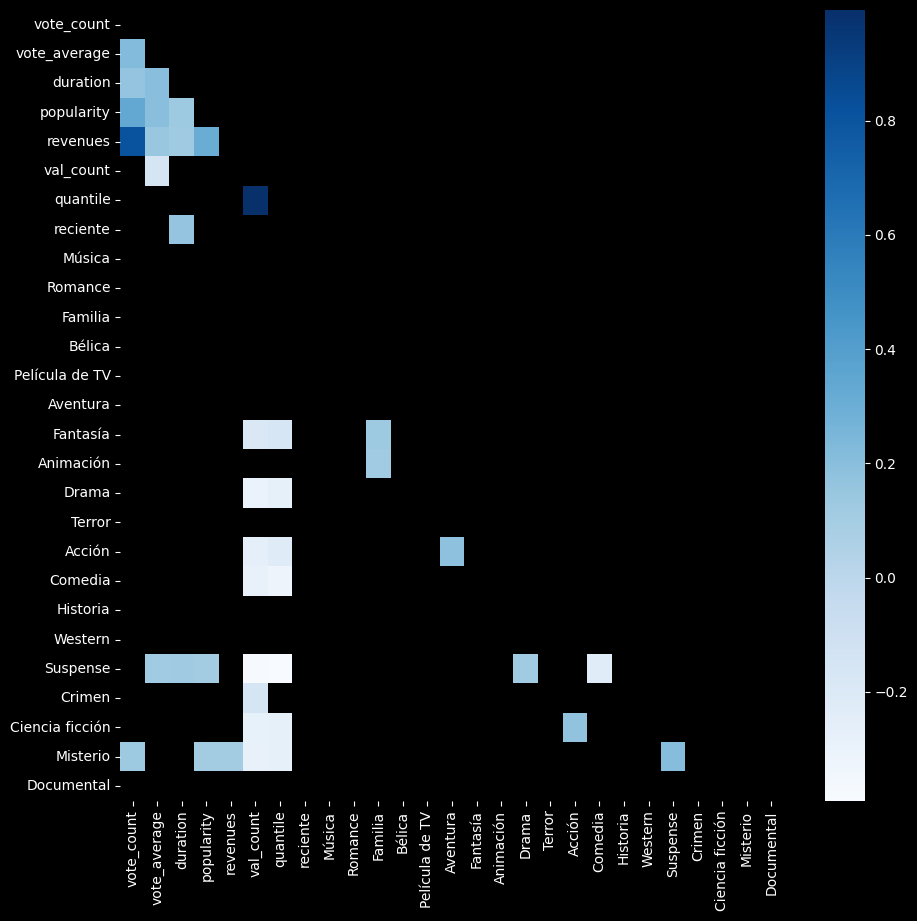

In [21]:
import matplotlib.pyplot as plt
a4_dims = (10.7, 10.27)
dfCorr = X.corr()
filteredDf = dfCorr[((dfCorr >= .105) | (dfCorr <= -.15)) & (dfCorr !=1.000)]
fig, ax = plt.subplots(figsize=a4_dims)
matrix = np.triu(dfCorr)
sns.heatmap(filteredDf, annot=False, cmap="Blues", mask = matrix);

In [22]:
dataframe[[ "id", "title","quantile",   'vote_average', 'duration', "popularity", 'revenues',"val_count", "is_terror_comedia", "Crimen", "Animación", "Fantasía"]].to_csv("../data/dataset_terror_clean_features.csv")